# train_hyperasの確認

In [52]:
import numpy as np
import pandas as pd
#最大表示列数の指定
pd.set_option('display.max_columns', 300)

%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

In [53]:
race_df = pd.read_csv("./csv/cleaned_race_data.csv", sep=",", low_memory=False)
horse_df = pd.read_csv("./csv/cleaned_horse_data.csv", sep=",", low_memory=False)

In [54]:
predict_result = pd.read_csv("./predict/train_regression_no_obstacle_by_MLmethods_predicted_test_tokyo.csv", sep=",")

In [55]:
# 障害レースは取り除く
predict_result = predict_result[predict_result["is_obstacle"]==0]

In [56]:
predict_result.head()

,race_id,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,horse_weight,tamer_id,owner_id,date,is_senba,is_mesu,is_osu,distance,horse_weight_dif,burden_weight_rate,ground_status,total_horse_number,is_obstacle,weather_rain,weather_snow,weather_小雨,weather_小雪,weather_晴,weather_曇,weather_雨,weather_雪,season_cos,season_sin,time_in_the_day,pre_date_diff,is_rider_same,is_tamer_same,is_owner_same,rank_1,frame_number_1,horse_number_1,age_1,burden_weight_1,rider_id_1,goal_time_1,half_way_rank_1,last_time_1,odds_1,popular_1,horse_weight_1,is_down_1,distance_1,avg_velocity_1,horse_weight_dif_1,burden_weight_rate_1,ground_status_1,total_horse_number_1,is_obstacle_1,weather_rain_1,weather_snow_1,weather_小雨_1,weather_小雪_1,weather_晴_1,weather_曇_1,weather_雨_1,weather_雪_1,season_cos_1,season_sin_1,time_in_the_day_1,pre_date_diff_1,is_rider_same_1,is_tamer_same_1,is_owner_same_1,interval_date_1,rank_2,frame_number_2,horse_number_2,age_2,burden_weight_2,rider_id_2,goal_time_2,half_way_rank_2,last_time_2,odds_2,popular_2,horse_weight_2,is_down_2,distance_2,avg_velocity_2,horse_weight_dif_2,burden_weight_rate_2,ground_status_2,total_horse_number_2,is_obstacle_2,weather_rain_2,weather_snow_2,weather_小雨_2,weather_小雪_2,weather_晴_2,weather_曇_2,weather_雨_2,weather_雪_2,season_cos_2,season_sin_2,time_in_the_day_2,pre_date_diff_2,is_rider_same_2,is_tamer_same_2,is_owner_same_2,interval_date_2,rank_3,frame_number_3,horse_number_3,age_3,burden_weight_3,rider_id_3,goal_time_3,half_way_rank_3,last_time_3,odds_3,popular_3,horse_weight_3,is_down_3,distance_3,avg_velocity_3,horse_weight_dif_3,burden_weight_rate_3,ground_status_3,total_horse_number_3,is_obstacle_3,weather_rain_3,weather_snow_3,weather_小雨_3,weather_小雪_3,weather_晴_3,weather_曇_3,weather_雨_3,weather_雪_3,season_cos_3,season_sin_3,time_in_the_day_3,pre_date_diff_3,is_rider_same_3,is_tamer_same_3,is_owner_same_3,interval_date_3,is_tansyo,is_hukusyo,peds_0,peds_1,peds_2,peds_3,peds_4,peds_5,peds_6,peds_7,peds_8,peds_9,peds_10,peds_11,peds_12,peds_13,peds_14,peds_15,peds_16,peds_17,peds_18,peds_19,peds_20,peds_21,peds_22,peds_23,peds_24,peds_25,peds_26,peds_27,peds_28,peds_29,peds_30,peds_31,peds_32,peds_33,peds_34,peds_35,peds_36,peds_37,peds_38,peds_39,peds_40,peds_41,peds_42,peds_43,peds_44,peds_45,peds_46,peds_47,peds_48,peds_49,peds_50,peds_51,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61,predict_goal_time
0,201905021111,4.0,7.0,4350,6.0,56.0,351,83.8,530.0,304,659,2019-05-25 15:45:00,0.0,0.0,1.0,1400.0,0.0,0.105660,1.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.810998,0.585049,15,97.0,0.0,0.0,1.0,9.0,6.0,9.0,6.0,57.0,87,97.2,3.000000,36.6,429.0,14.0,530.0,0.0,1600.0,16.460905,-4.0,0.107547,1.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.688967,0.724793,15.0,20.0,1.0,1.0,1.0,97.0,5.0,5.0,9.0,6.0,56.0,87.0,84.3,5.00,36.3,131.7,12.0,534.0,0.0,1400.0,16.607355,2.0,0.104869,1.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.897805,0.440394,15.0,111.0,0.0,1.0,1.0,118.0,12.0,4.0,8.0,5.0,56.0,214.0,85.1,8.00,37.5,99.6,13.0,524.0,0.0,1400.0,16.451234,-8.0,0.106870,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.134711,-0.990885,15.0,147.0,0.0,1.0,1.0,229.0,0,1,359,360,127,43,775,1577,85,162,158,179,307,648,748,3296,41,95,115,42,13,146,36,134,104,120,32,591,371,733,1100,3010,27,44,61,94,10,128,24,17,15,114,134,77,168,37,235,249,28,14,59,94,155,296,382,221,96,241,363,850,247,788,1025,2711,85.755523
1,201905030209,7.0,9.0,5524,4.0,57.0,154,121.1,504.0,211,1569,2019-06-02 14:25:00,0.0,0.0,1.0,2000.0,4.0,0.113095,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.882418,0.470465,14,35.0,0.0,1.0,1.0,3.0,2.0,2.0,4.0,55.0,157,145.3,7.750000,33.3,2.5,1.0,500.0,0.0,2400.0,16.517550,-6.0,0.110000,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.455495,0.890238,14.0,NaN,0.0,0.0,0.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [57]:
# 予測値を100倍して見やすくする
predict_result["predict_goal_time"] = predict_result["predict_goal_time"]*100

In [58]:
predict_result.shape

(2458, 209)

## accuracy の計算
groupbyして、レースごとに確率の最も高い馬を見つける。
正解していたかを判定

In [59]:
# group by したデータフレームに対して行う処理
def check_is_correct_predict_is_tansyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_goal_time'].idxmin()]
    return max_pred_horse['is_tansyo']
def check_is_correct_predict_is_hukusyo(one_race_data):
    max_pred_horse = one_race_data.loc[one_race_data['predict_goal_time'].idxmin()]
    return max_pred_horse['is_hukusyo']

In [60]:
part_predict_result = predict_result[["race_id", "date", "horse_number", "predict_goal_time", "is_hukusyo", "is_tansyo"]]

is_tansyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_tansyo)
is_hukusyo = part_predict_result.groupby('race_id').apply(check_is_correct_predict_is_hukusyo)
print("tansyo accuracy: {}".format(is_tansyo.sum()/is_tansyo.size))
print("hukusyo accuracy: {}".format(is_hukusyo.sum()/is_hukusyo.size))

tansyo accuracy: 0.07291666666666667
hukusyo accuracy: 0.296875


In [61]:
predict_df = predict_result[["race_id", "date", "horse_number", "predict_goal_time", "is_hukusyo", "is_tansyo"]]

## 同着の試合があるかもしれないので取り除く
同着はデータがおかしくなっているので取り除く。
また、10頭以下のレースは取り除く

In [62]:
merged_df = pd.merge(predict_df, race_df, on="race_id")
merged_df = pd.merge(merged_df, horse_df, on=['race_id','horse_number'])
merged_df['tansyo_return'] = merged_df['is_tansyo']*merged_df['tansyo'] - 100
merged_df["hukusyo_return"] = (merged_df["rank"]==1)*merged_df["hukusyo_first"] + (merged_df["rank"]==2)*merged_df["hukusyo_second"] + (merged_df["rank"]==3)*merged_df["hukusyo_third"]  - 100

In [63]:
def remove_same(one_horse_data):
    #  数レース分の情報を結合
    result_df = one_horse_data.copy()
    
    if result_df["rank"].duplicated().sum() or result_df["total_horse_number"].iloc[0]<10:
        return 
    else:
        return result_df

In [64]:
print(merged_df.shape)
removed = merged_df.groupby("race_id").apply(remove_same)
print(removed.shape)

(2458, 61)
(2102, 61)


## 可視化

In [65]:
removed = removed.reset_index(drop=True)
removed.head()

,race_id,date_x,horse_number,predict_goal_time,is_hukusyo,is_tansyo,race_round,weather,ground_status,date_y,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance_x,weather_rain,weather_snow,rank,frame_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance_y,avg_velocity,horse_weight_dif,burden_weight_rate,tansyo_return,hukusyo_return
0,201905021111,2019-05-25 15:45:00,7.0,8575.552261,1,0,11,晴,1,2019-05-25 15:45:00,東京,16,1,1,5,10,4,7,250,130,240,180,790,1320,490,340,980,2000,2450,10480,0.0,ダ,左,1400,0,0,3,4,2013102815,6,56.0,5386,83.8,8.000000,35.4,4.8,2.0,530.0,1164,184033,2019-05-25 15:45:00,0,0,0,1,1400,16.706444,0.0,0.105660,-100,80
1,201905030209,2019-06-02 14:25:00,9.0,12158.591288,0,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,7,7,2015104512,4,57.0,1088,121.1,7.333333,33.7,5.0,2.0,504.0,1071,415800,2019-06-02 14:25:00,0,0,0,1,2000,16.515277,4.0,0.113095,-100,-100
2,201905030209,2019-06-02 14:25:00,11.0,12161.260137,0,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,4,8,2015101568,4,57.0,5339,120.7,8.000000,33.3,3.3,1.0,508.0,1126,3060,2019-06-02 14:25:00,0,0,0,1,2000,16.570008,2.0,0.112205,-100,-100
3,201905030209,2019-06-02 14:25:00,4.0,12112.265213,0,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,6,4,2014105760,5,57.0,5212,120.9,11.000000,33.2,12.6,7.0,524.0,1079,415800,2019-06-02 14:25:00,0,0,0,1,2000,16.542597,2.0,0.108779,-100,-100
4,201905030209,2019-06-02 14:25:00,5.0,12239.141162,1,0,9,曇,1,2019-06-02 14:25:00,東京,11,3,3,2,2,5,5,3940,760,220,310,8930,8630,2400,3150,650,21780,15270,154550,0.0,芝,左,2000,0,0,3,5,2015103627,4,57.0,5386,120.5,4.666667,33.3,9.4,5.0,466.0,1138,369030,2019-06-02 14:25:00,0,0,0,1,2000,16.597510,-14.0,0.122318,-100,210


<AxesSubplot:ylabel='Frequency'>

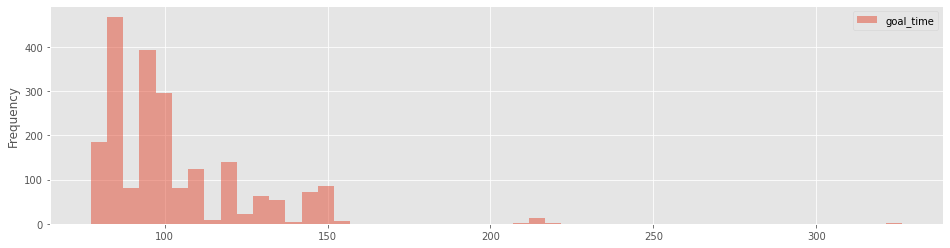

In [78]:
# goal_timeの分布についてヒストグラム
removed.plot(kind='hist', y='goal_time' , bins=50, figsize=(16,4), alpha=0.5)

<AxesSubplot:xlabel='goal_time', ylabel='odds'>

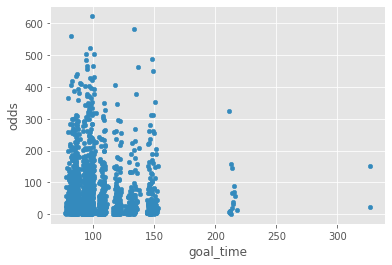

In [67]:
# オッズと予測値
removed.plot(kind='scatter', x='goal_time', y='odds')

<AxesSubplot:xlabel='goal_time', ylabel='odds'>

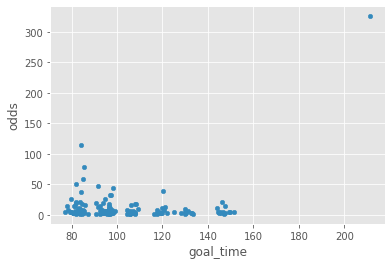

In [68]:
# 実際に1位になったものについてのオッズと予測値
removed[removed["rank"]==1].plot(kind='scatter', x='goal_time', y='odds')

<AxesSubplot:xlabel='goal_time', ylabel='odds'>

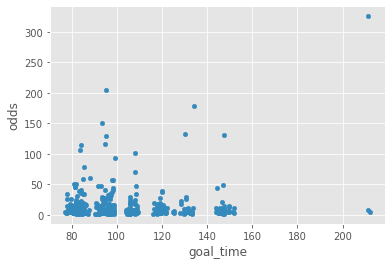

In [69]:
# 実際に複勝圏内になったものについてのオッズと予測値
removed[removed["rank"]<=3].plot(kind='scatter', x='goal_time', y='odds')

## 的中率の計算(実際に1位や３位以内であった確率）

In [70]:
# cut
removed["goal_time_cut"] = pd.cut(removed["goal_time"], 10)

c:\Users\koich\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='goal_time_cut'>

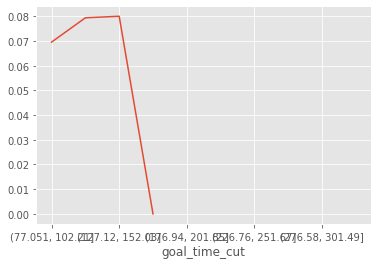

In [71]:
# tansyo
def right_rate_tansyo(one_cut):
    return one_cut["is_tansyo"].sum()/len(one_cut)
    
removed.groupby("goal_time_cut").apply(right_rate_tansyo).plot()

c:\Users\koich\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='goal_time_cut'>

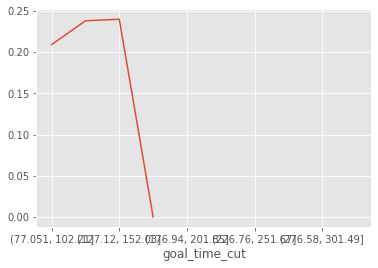

In [72]:
# hukusyo
def right_rate_hukusyo(one_cut):
    return one_cut["is_hukusyo"].sum()/len(one_cut)
    
removed.groupby("goal_time_cut").apply(right_rate_hukusyo).plot()

## 回収率の計算

In [81]:
def get_return(one_race):
    tmp = one_race.reset_index()
    return tmp.loc[tmp['predict_goal_time'].idxmin(),['tansyo_return','hukusyo_return','odds','date']]

race_result = removed.groupby("race_id").apply(get_return)

In [82]:
race_result = race_result.sort_values("date")

In [83]:
race_result = race_result.set_index("date")

### 単勝

<AxesSubplot:xlabel='date'>

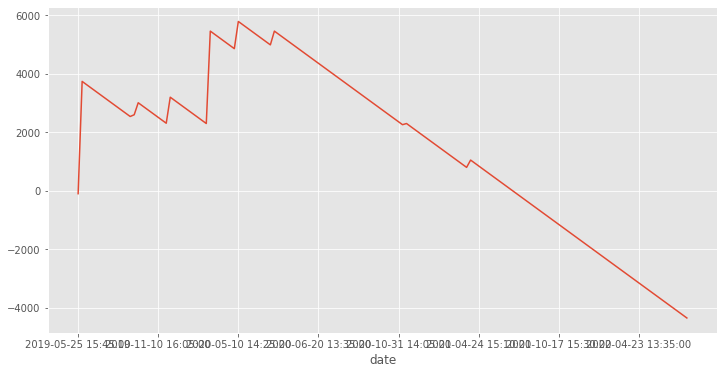

In [84]:
# 単純に買い続けたとき
simple = race_result["tansyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

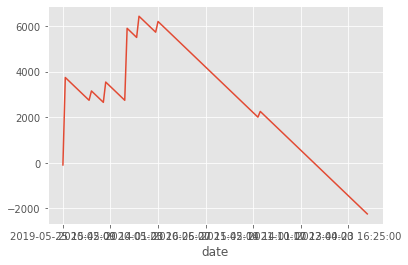

In [105]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>2) & (race_result["odds"]<100)), 'tansyo_return'].cumsum()
simple.plot()

### 複勝

<AxesSubplot:xlabel='date'>

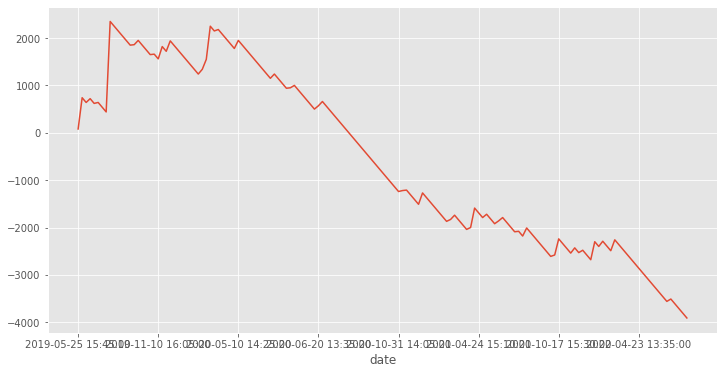

In [89]:
# 単純に買い続けたとき
simple = race_result["hukusyo_return"].cumsum()
simple.plot(figsize=(12, 6))

<AxesSubplot:xlabel='date'>

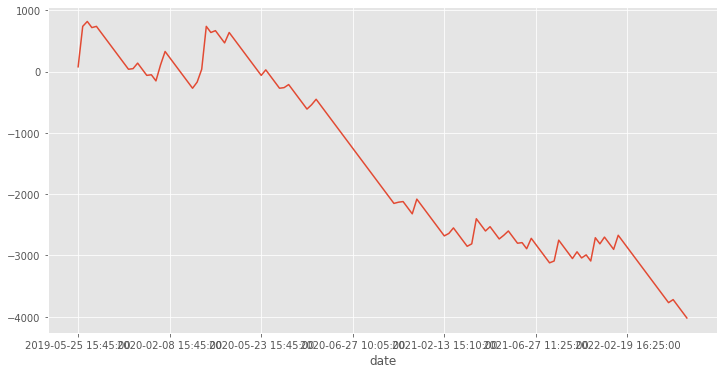

In [102]:
# オッズがある範囲のとき
simple = race_result.loc[((race_result["odds"]>1.2) & (race_result["odds"]<100)), 'hukusyo_return'].cumsum()
simple.plot(figsize=(12, 6))